# Dirac Notation Implementation - DEMO

2024-03-01

## Set up the environment

In [1]:
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr
session = WolframLanguageSession()

In [2]:
from qwhile import *
from diracdec import dirac_bigop_delta_trs, label_trs
trs = dirac_bigop_delta_trs + label_trs
from qwhile import forward_trs
trs = trs + forward_trs

In [3]:
sub = parse('''
{
        ket0 : KET('0');
        bra0 : BRA('0');
        ket1 : KET('1');
        bra1 : BRA('1');
        ketP :  "Sqrt[1/2]" SCR (ket0 ADD ket1) ;
        braP :  "Sqrt[1/2]" SCR (bra0 ADD bra1) ;
        ketM :  "Sqrt[1/2]" SCR (ket0 ADD ("-1" MLTK ket1)) ;
        braM :  "Sqrt[1/2]" SCR (bra0 ADD ("-1" MLTB bra1)) ;

        beta00 :  "Sqrt[1/2]" SCR ((ket0 TSRK ket0) ADD (ket1 TSRK ket1));

        I2 : (ket0 OUTER bra0) ADD (ket1 OUTER bra1);

        Z : (ket0 OUTER bra0) ADD ("-1" SCR (ket1 OUTER bra1));

        X : (ket0 OUTER bra1) ADD (ket1 OUTER bra0);

        Y : ("-I" SCR (ket0 OUTER bra1)) ADD ("I" SCR (ket1 OUTER bra0));


        H :  "Sqrt[1/2]" SCR ((ket0 OUTER bra0) ADD (ket0 OUTER bra1) ADD (ket1 OUTER bra0) ADD ("-1" SCR (ket1 OUTER bra1)));

        CX :  ((ket0 TSRK ket0) OUTER (bra0 TSRB bra0))
                    ADD ((ket0 TSRK ket1) OUTER (bra0 TSRB bra1)) 
                    ADD ((ket1 TSRK ket1) OUTER (bra1 TSRB bra0))
                    ADD ((ket1 TSRK ket0) OUTER (bra1 TSRB bra1));

        CZ :  ((ket0 TSRK ket0) OUTER (bra0 TSRB bra0))
                    ADD ((ket0 TSRK ket1) OUTER (bra0 TSRB bra1)) 
                    ADD ((ket1 TSRK ket0) OUTER (bra1 TSRB bra0))
                    ADD ("-1" SCR ((ket1 TSRK ket1) OUTER (bra1 TSRB bra1)));
        }
          ''').get_idempotent()


In [4]:
print(sub)

┌───────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                                                                                           │
│ bra1 ↦ <1|                                                                                                │
│                                                                                                           │
│ X ↦ ((|0>⊗<1|) + (|1>⊗<0|))                                                                               │
│                                                                                                           │
│ CX ↦ (((|0>⊗|0>)⊗(<0|⊗<0|)) + ((|0>⊗|1>)⊗(<0|⊗<1|)) + ((|1>⊗|1>)⊗(<1|⊗<0|)) + ((|1>⊗|0>)⊗(<1|⊗<1|)))      │
│                                                                                                           │
│ ket0 ↦ |0>                                                                                                │
│         

## QWhile Forward

### easy example

In [16]:
cfg = parse('''
    <
    while [1] (KET('0') OUTER BRA('0'))[q] do
             X[q];
    end; , (ket0 OUTER bra0)[q] >
             ''')

In [17]:
cfg_sub = sub(cfg)
print(cfg_sub)

  while [1] (|0>⊗<0|)[q] do                     
<   ((|0>⊗<1|) + (|1>⊗<0|))[q]; , (|0>⊗<0|)[q] >
  end;                                          


In [18]:
trs.normalize(cfg_sub, verbose=True)

== STEP 1 ==
Current Term:
  while [1] (|0>⊗<0|)[q] do                     
<   ((|0>⊗<1|) + (|1>⊗<0|))[q]; , (|0>⊗<0|)[q] >
  end;                                          

┌apply LABEL-LIFT-17────────────┐
│(|0>⊗<0|)[q] -> (|0>[q]⊗<0|[q])│
└───────────────────────────────┘

== STEP 2 ==
Current Term:
  while [1] (|0>[q]⊗<0|[q]) do                  
<   ((|0>⊗<1|) + (|1>⊗<0|))[q]; , (|0>⊗<0|)[q] >
  end;                                          

┌apply LABEL-LIFT-5─────────────────────────────────────────┐
│((|0>⊗<1|) + (|1>⊗<0|))[q] -> ((|0>⊗<1|)[q] + (|1>⊗<0|)[q])│
└───────────────────────────────────────────────────────────┘

== STEP 3 ==
Current Term:
  while [1] (|0>[q]⊗<0|[q]) do                     
<   ((|0>⊗<1|)[q] + (|1>⊗<0|)[q]); , (|0>⊗<0|)[q] >
  end;                                             

┌apply LABEL-LIFT-17────────────┐
│(|0>⊗<1|)[q] -> (|0>[q]⊗<1|[q])│
└───────────────────────────────┘

== STEP 4 ==
Current Term:
  while [1] (|0>[q]⊗<0|[q]) do                

cfg(Halt(), (((1O ADD (WolframCScalar(-1) SCR (LABELLED1(KET(WolframABase(0)), q) OUTERL LABELLED1(BRA(WolframABase(0)), q)))) MLTKL LABELLED1(KET(WolframABase(0)), q)) OUTERL (LABELLED1(BRA(WolframABase(0)), q) MLTBL (1O ADD (WolframCScalar(-1) SCR (LABELLED1(KET(WolframABase(0)), q) OUTERL LABELLED1(BRA(WolframABase(0)), q)))))))

### unsuccessful example

In [5]:
cfg = parse('''
    <
    while [1] (KET('0') OUTER BRA('0'))[q] do
             H[q];
    end; , (ketP OUTER braP)[q] >
             ''')

In [6]:
print(cfg)

  while [1] (|0>⊗<0|)[q] do                   
<   H[q];                   , (ketP⊗braP)[q] >
  end;                                        


In [7]:
cfg_sub = sub(cfg)

In [8]:
print(cfg_sub)

  while [1] (|0>⊗<0|)[q] do                                                                                                
    ⎛   1                                                        ⎞       ⎛⎛   1               ⎞ ⎛   1               ⎞⎞     
<   ⎜-------.((|0>⊗<0|) + (|0>⊗<1|) + (|1>⊗<0|) + (-1.(|1>⊗<1|)))⎟[q]; , ⎜⎜-------.(|0> + |1>)⎟⊗⎜-------.(<0| + <1|)⎟⎟[q] >
    ⎝Sqrt[2]                                                     ⎠       ⎝⎝Sqrt[2]            ⎠ ⎝Sqrt[2]            ⎠⎠     
  end;                                                                                                                     


In [ ]:
trs.normalize(cfg_sub, verbose=True)

## Examples with label

### 1

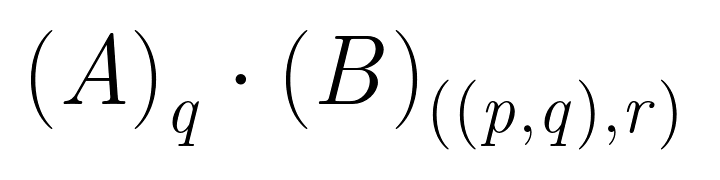

In [ ]:
a = parse(''' A[q] MLTOL B[PAIRR(PAIRR(p, q), r)]''')
a.render_tex()

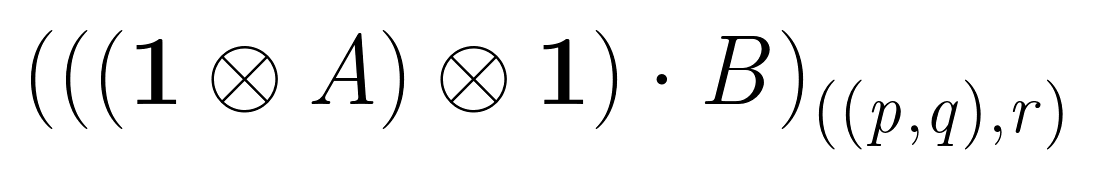

In [ ]:
trs.normalize(a).render_tex()

### 2

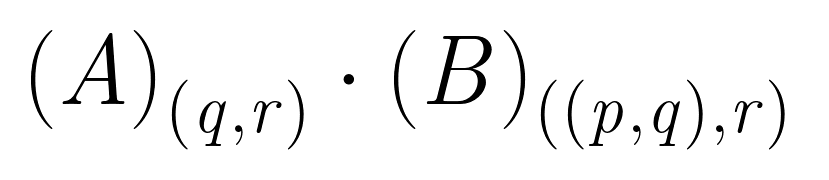

In [ ]:
a = parse(''' A[PAIRR(q, r)] MLTOL B[PAIRR(PAIRR(p, q), r)]''')
a.render_tex()

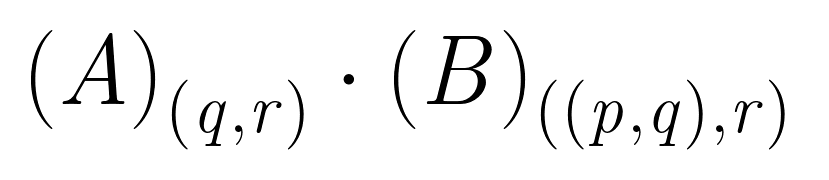

In [ ]:
trs.normalize(a).render_tex()

### 3

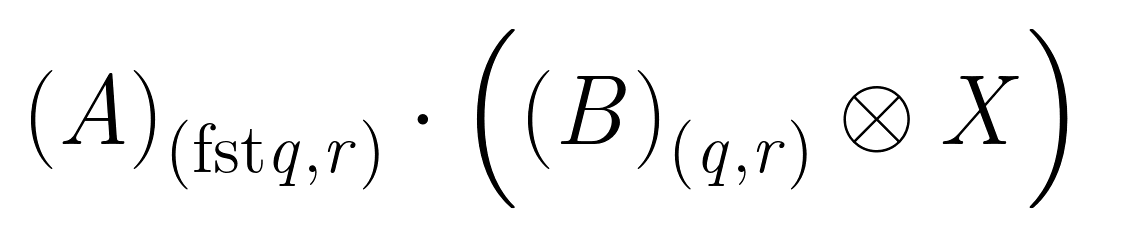

In [ ]:
a = parse(''' A[PAIRR(FSTR(q), r)] MLTOL (B[PAIRR(q, r)] TSROL X)''')
a.render_tex()

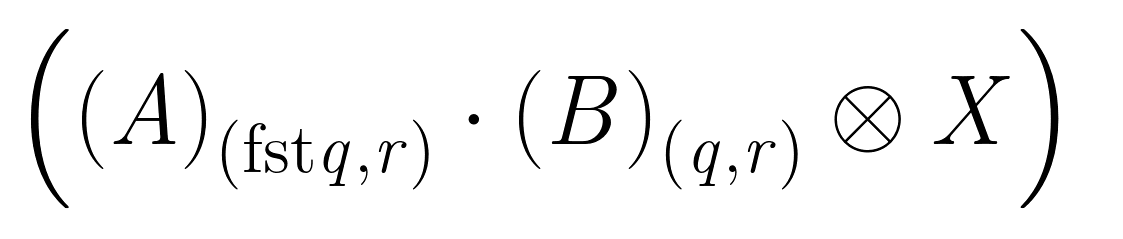

In [ ]:
trs.normalize(a).render_tex()

### 4

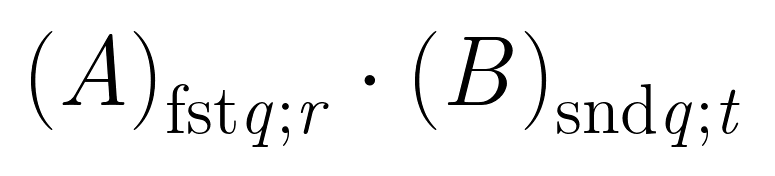

In [ ]:
a = parse(''' A[FSTR(q); r] MLTOL B[SNDR(q); t]''')
a.render_tex()

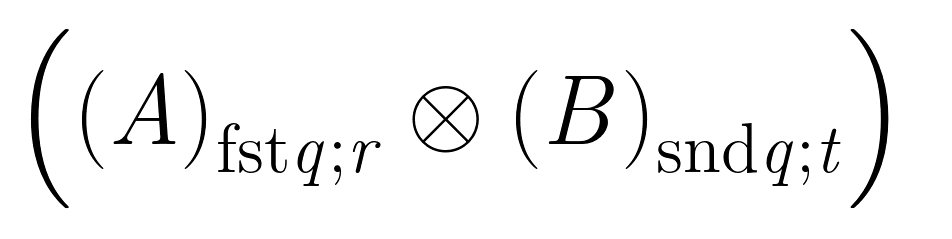

In [ ]:
trs.normalize(a).render_tex()

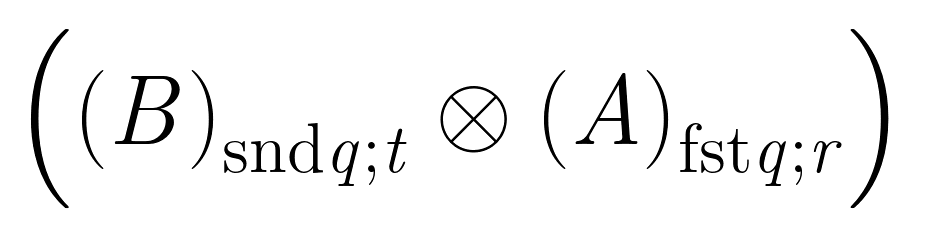

In [ ]:
c = parse(''' (B[SNDR(q); t]) TSROL (A[FSTR(q); r]) ''')
c.render_tex()

In [ ]:
assert trs.normalize(a) == c

## Examples

### Operation on Maximally Entangled State

For all $A$,
$$
A_{S} \ket{\Phi}_{S, T} = A^\top_{T} \ket{\Phi}_{S, T}
$$
where
$$
\ket{\Phi} = \sum_{i}\ket{i}\ket{i}
$$

In [ ]:
a = parse(''' 
                (
                    
                   (SUM(i, KET(i) OUTER BRA(i))[S]) MLTOL (A[S])
                ) 
                MLTKL 
                (
                    SUM(i, KET(PAIR(i, i))[PAIRR(S, T)])
                ) 
            ''')

b = parse(''' 
                (
                    (SUM(i, KET(i) OUTER BRA(i))[T]) MLTOL (TP(A)[T])
                ) 
                MLTKL 
                (
                    SUM(i, KET(PAIR(i, i))[PAIRR(S, T)])
                ) 
            ''')

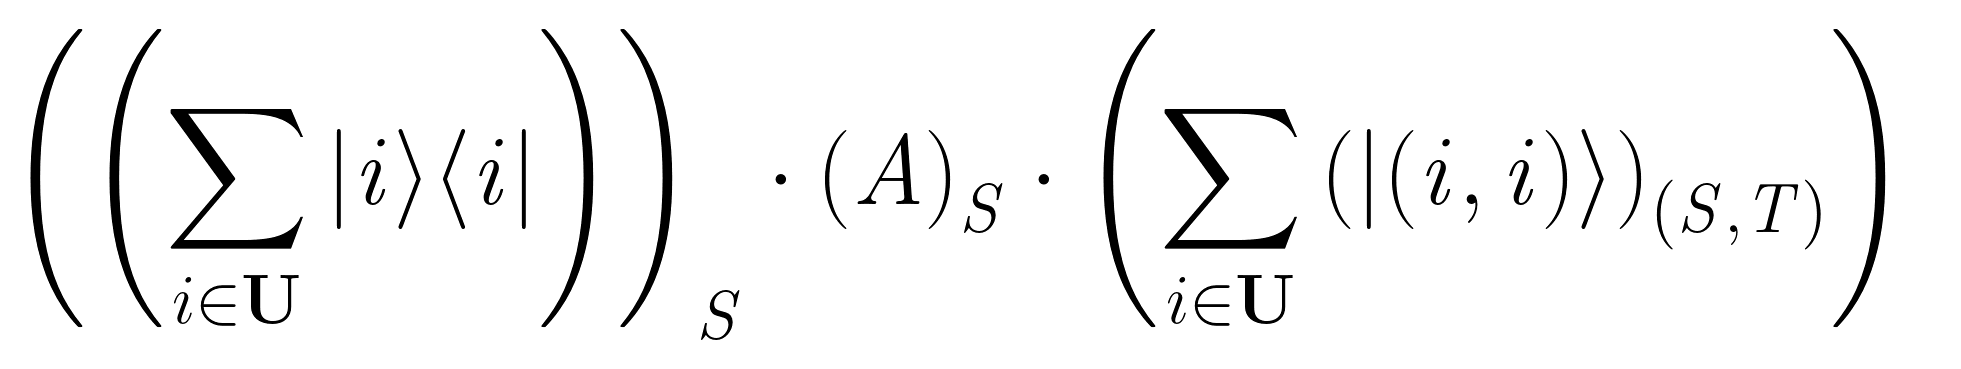

In [ ]:
a.render_tex()

In [ ]:
print(repr(a))

((LABELLED1(Sum(((i, USET),), (KET(i) OUTER BRA(i))), S) MLTOL LABELLED1(A, S)) MLTKL Sum(((i, USET),), LABELLED1(KET(PAIR(i, i)), PAIRR(S, T))))


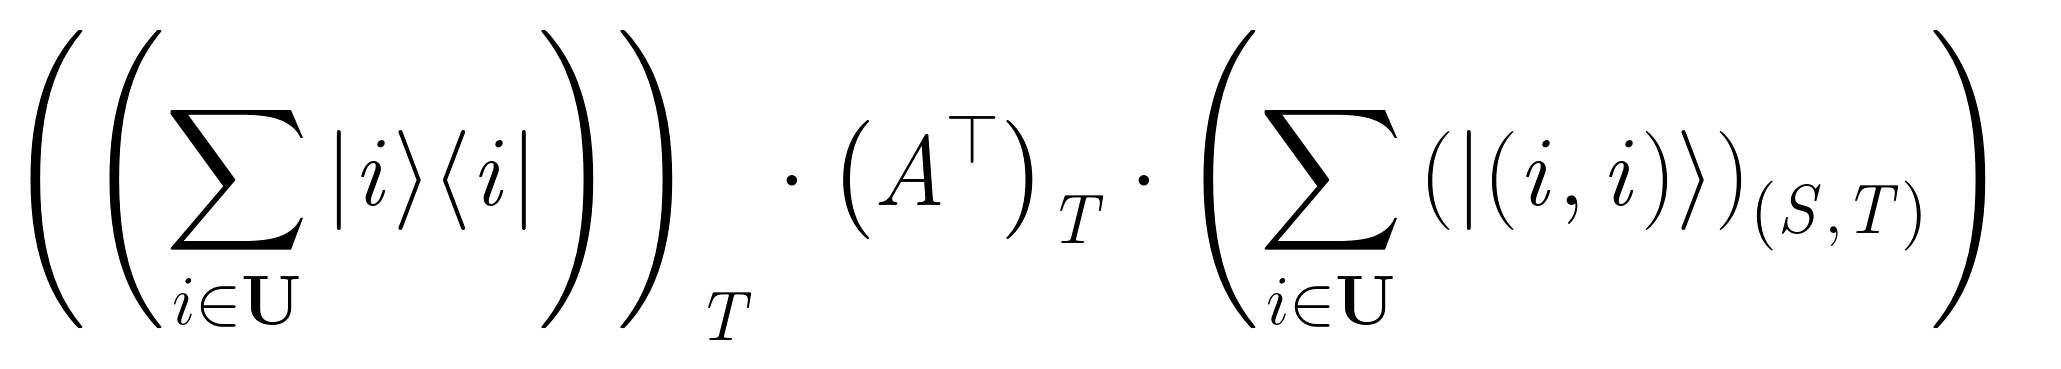

In [ ]:
b.render_tex()

In [ ]:
norm_a = trs.normalize(a)
norm_b = trs.normalize(b)

assert trs.normalize(juxt(norm_a)) == trs.normalize(juxt(norm_b))

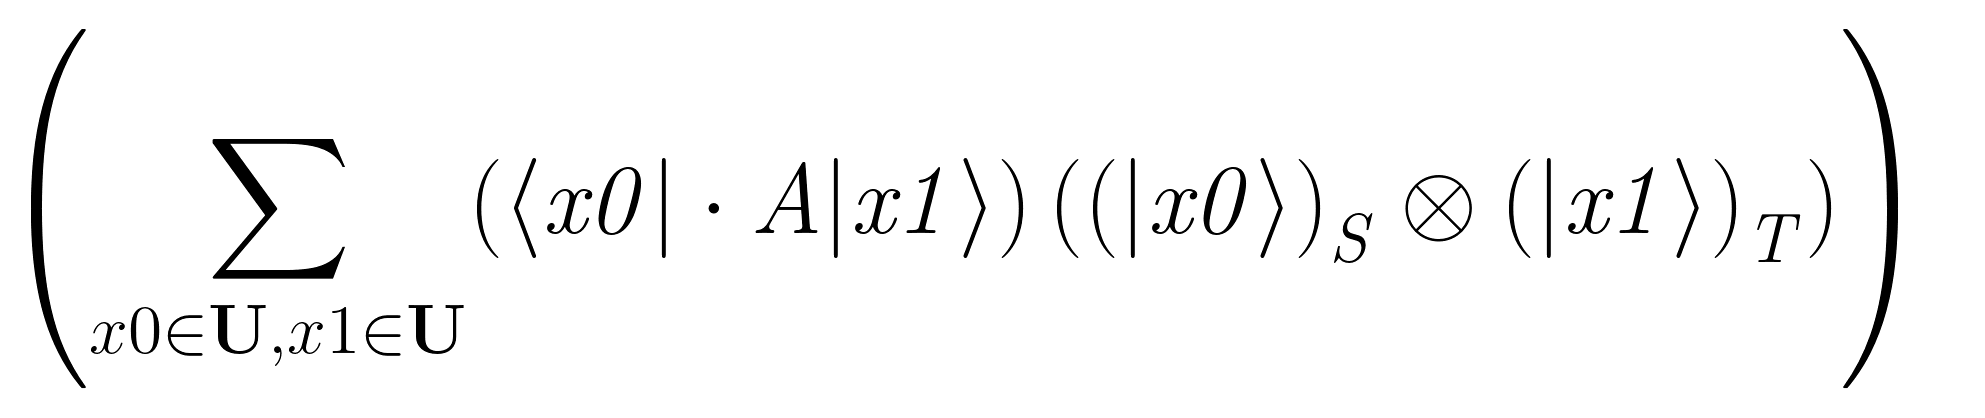

In [ ]:
trs.normalize(a).render_tex()

In [ ]:
print(repr(trs.normalize(a)))

Sum(((x0, USET), (x1, USET)), ((BRA(x0) DOT (A MLTK KET(x1))) SCR (LABELLED1(KET(x0), S) TSRKL LABELLED1(KET(x1), T))))


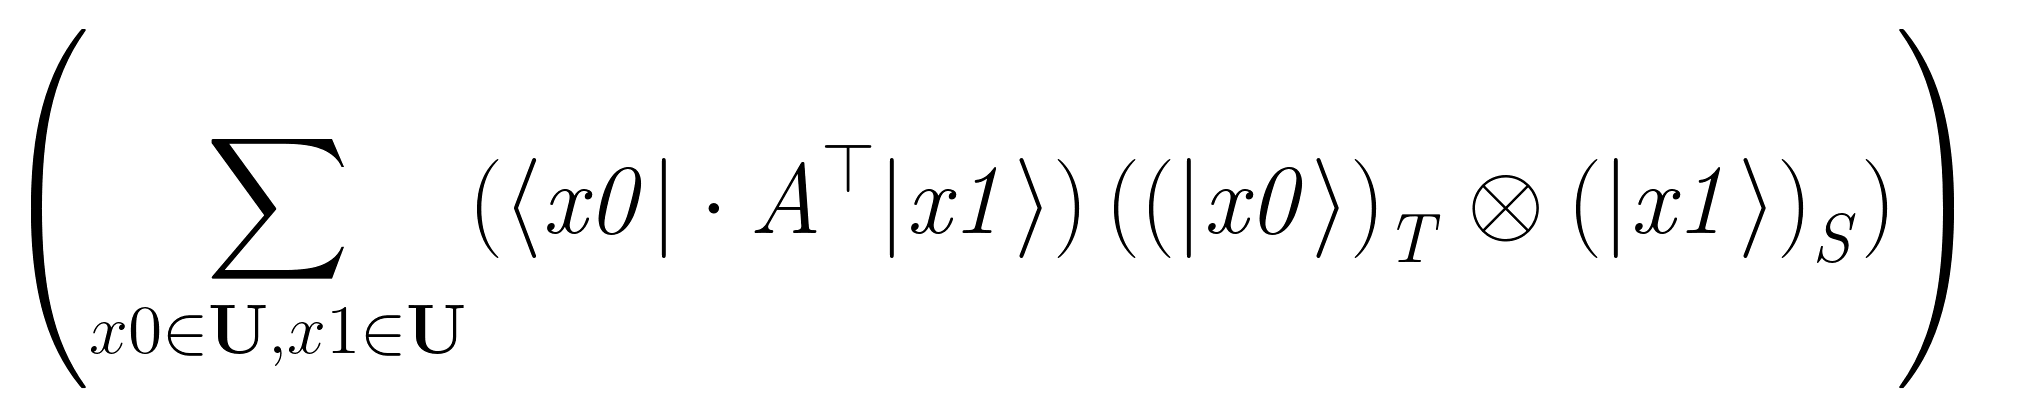

In [ ]:
trs.normalize(b).render_tex()

In [ ]:
trs.normalize(a, verbose=True)

Renaming rule variables...
== STEP 1 ==
Current Term:
⎛⎛ __                    ⎞  __                   ⎞
⎜⎜ \                     ⎟  \                    ⎟
⎜⎜ /    (|i>⊗<i|)[S]·A[S]⎟· /    |(i, i)>[(S, T)]⎟
⎜⎜ ‾‾                    ⎟  ‾‾                   ⎟
⎝⎝i ∈ 𝐔                  ⎠ i ∈ 𝐔                 ⎠

┌apply LABEL-SUM-1───────────────────────┐
│ __                    __               │
│ \                     \                │
│ /    (|i>⊗<i|)[S] ->  /    (|i>⊗<i|)[S]│
│ ‾‾                    ‾‾               │
│i ∈ 𝐔                 i ∈ 𝐔             │
└────────────────────────────────────────┘

== STEP 2 ==
Current Term:
⎛⎛ __                    ⎞  __                   ⎞
⎜⎜ \                     ⎟  \                    ⎟
⎜⎜ /    (|i>⊗<i|)[S]·A[S]⎟· /    |(i, i)>[(S, T)]⎟
⎜⎜ ‾‾                    ⎟  ‾‾                   ⎟
⎝⎝i ∈ 𝐔                  ⎠ i ∈ 𝐔                 ⎠

┌apply LABEL-LIFT-17────────────┐
│(|i>⊗<i|)[S] -> (|i>[S]⊗<i|[S])│
└───────────────────────────────┘

==

Sum(((x0, USET), (x1, USET)), ((BRA(x0) DOT (A MLTK KET(x1))) SCR (LABELLED1(KET(x0), S) TSRKL LABELLED1(KET(x1), T))))

### abstraction and application: Choi representation

In [ ]:
choi_sub = Subst({
"choi" : parse(r''' 
FUN A . SUM(i, 
            SUM(j, 
                (BRA(i) DOT (A MLTK KET(j)))
                SCR KET(PAIR(i,j))
            )    
        ) '''),
"unchoi" : parse(r'''
FUN A . SUM(i,
            SUM(j,
                (BRA(PAIR(i, j)) DOT A)
                SCR (KET(i) OUTER BRA(j))
                )
        )''')
}).get_idempotent()

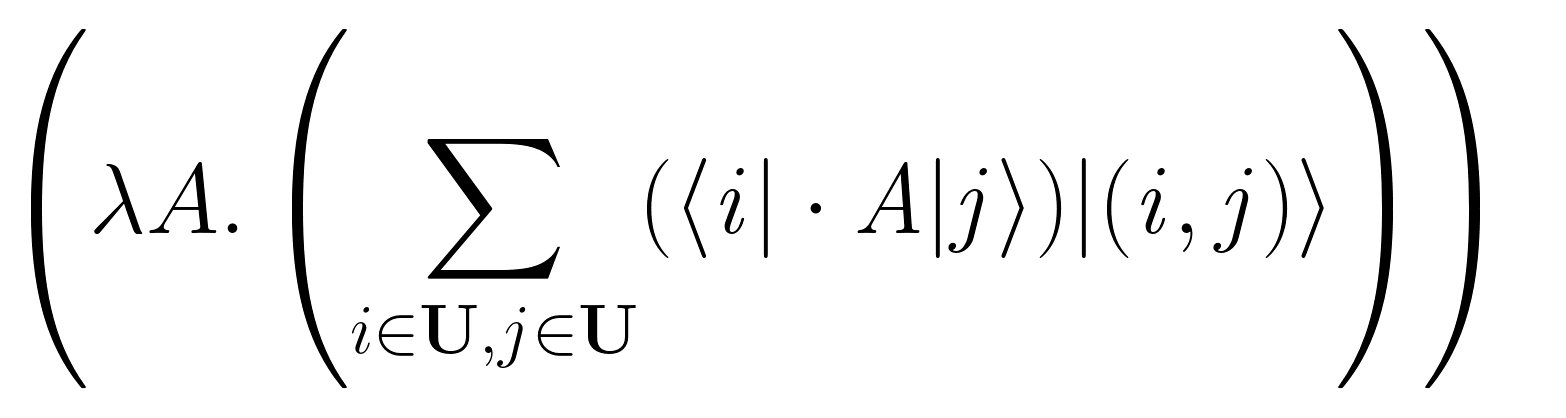

In [ ]:
a = choi_sub(parse(r'''choi'''))
a.render_tex()

In [ ]:
print(a)

⎛         __                              ⎞
⎜         \                               ⎟
⎜λ A.     /       ((<i|·(A·|j>)).|(i, j)>)⎟
⎜         ‾‾                              ⎟
⎝    i ∈ 𝐔, j ∈ 𝐔                         ⎠


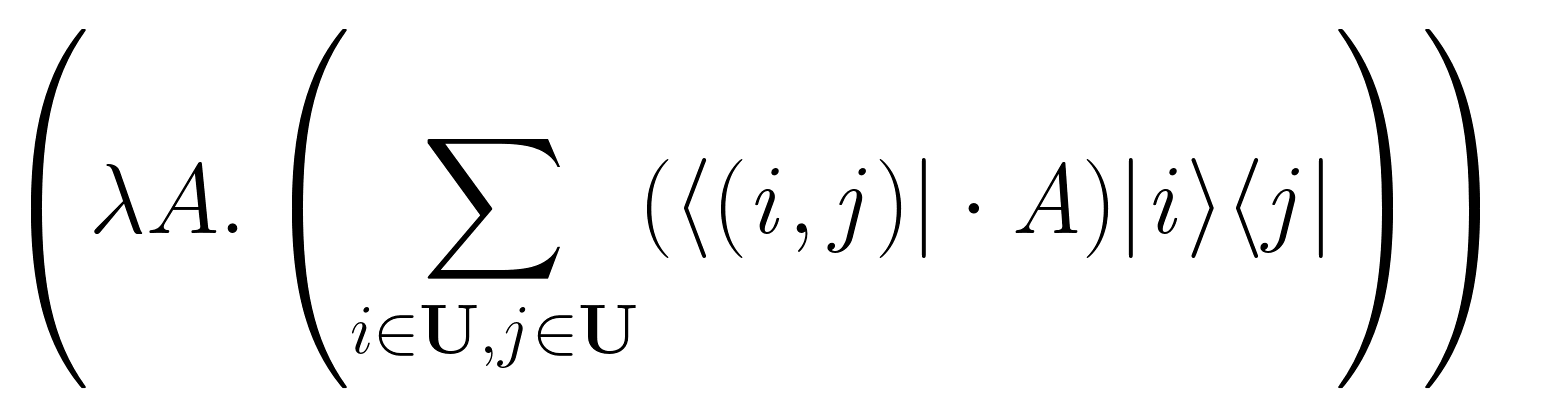

In [ ]:
b = choi_sub(parse(r'''unchoi'''))
b.render_tex()

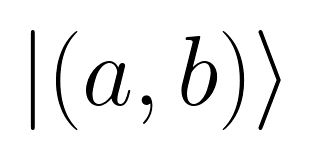

In [ ]:
a_ = choi_sub(parse(r''' choi @ (KET('a') OUTER BRA('b')) '''))
trs.normalize(a_).render_tex()

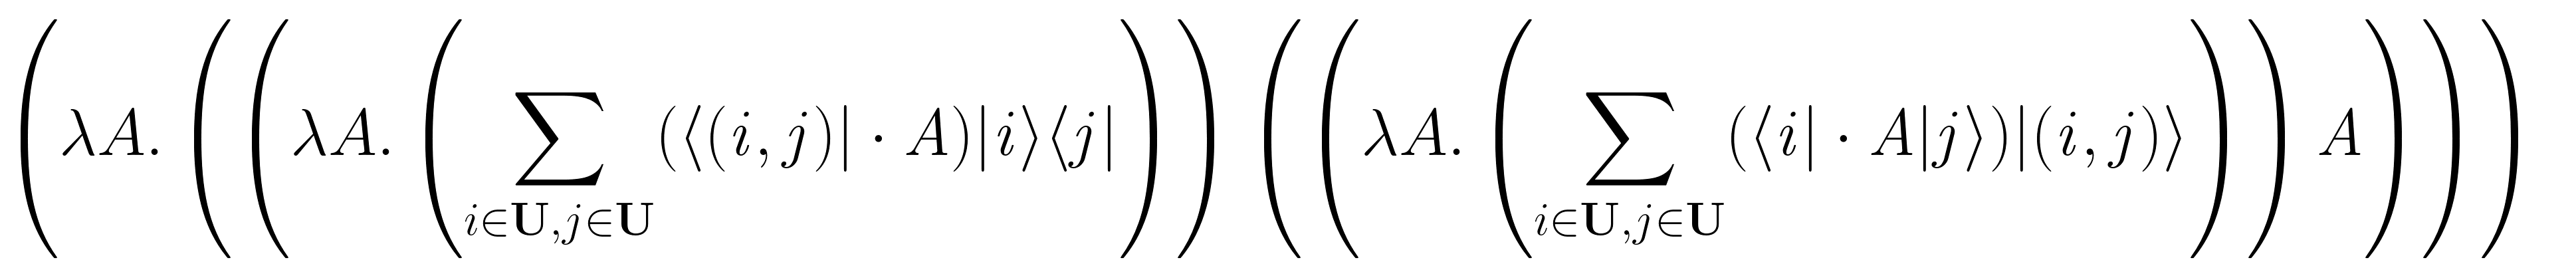

In [ ]:
c = choi_sub(parse(r'''FUN A . unchoi @ (choi @ A) '''))
c.render_tex()

In [ ]:
trs.normalize(c, verbose=True)

== STEP 1 ==
Current Term:
⎛    ⎛         __                              ⎞ ⎛         __                              ⎞  ⎞
⎜    ⎜         \                               ⎟ ⎜         \                               ⎟  ⎟
⎜λ A.⎜λ A.     /       ((<(i, j)|·A).(|i>⊗<j|))⎟ ⎜λ A.     /       ((<i|·(A·|j>)).|(i, j)>)⎟ A⎟
⎜    ⎜         ‾‾                              ⎟ ⎜         ‾‾                              ⎟  ⎟
⎝    ⎝    i ∈ 𝐔, j ∈ 𝐔                         ⎠ ⎝    i ∈ 𝐔, j ∈ 𝐔                         ⎠  ⎠

┌apply BETA-REDUCTION──────────────────────────────────────────────────────────────────┐
│⎛         __                              ⎞           __                              │
│⎜         \                               ⎟           \                               │
│⎜λ A.     /       ((<i|·(A·|j>)).|(i, j)>)⎟ A ->      /       ((<i|·(A·|j>)).|(i, j)>)│
│⎜         ‾‾                              ⎟           ‾‾                              │
│⎝    i ∈ 𝐔, j ∈ 𝐔                         ⎠   

LAMBDA[A](Sum(((i, USET), (j, USET)), ((BRA(i) DOT (A MLTK KET(j))) SCR (KET(i) OUTER BRA(j)))))

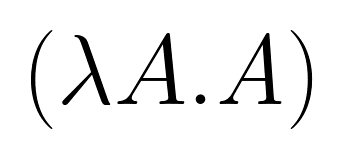

In [ ]:
entry_trs.normalize(trs.normalize(c)).render_tex()